In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Objectif

Je veux visualiser les données par semaine pour répondre le problème j'ai posé, *Quelle est la consommation électrique prévue pour la semaine à venir?*, avant créer le modèle de Machine Learning.

# charger des données

In [85]:
df = pd.read_csv('../data/output/cleaned_household_power_consumption.csv', 
                 infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

In [86]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


# créer les nouvelles données

Pour analyser les données par semaine, il faut savoir la consommation chaque jour. Donc, J'utilse la fonction `resample('D')` pour faire `groupby` par jour, et calculer la somme de consommation par jour.

In [87]:
day_gp = df.resample('D')
day_df = day_gp.sum()

In [88]:
day_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


In [21]:
day_df.to_csv('../data/output/day_cleaned_household_power_consumption.csv')

# Visualiser des données

## Global_active_power

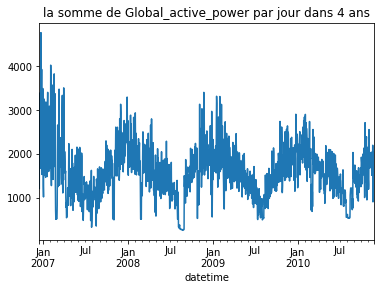

In [35]:
ax = day_df.Global_active_power.plot(title='la somme de Global_active_power par jour dans 4 ans')
ax.figure.savefig('../data/output/images/gap_days_all_years.png')

Ici, on peut voir la saisonnalité de la consummation. Les clients consoment plus dans l'hiver que l'été.

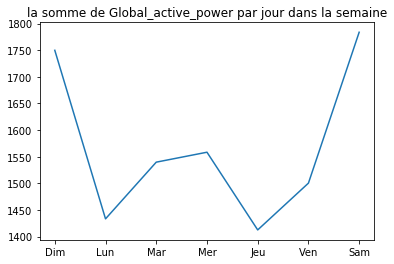

In [97]:
week_gap = [day_df.Global_active_power.values[i:i+7] for i in range(1,int(day_df.values.shape[0]-6),7)]
week_gap = np.array(week_gap)
week_mean_gap = np.mean(week_gap, axis=0)
x_labels = ['Dim', 'Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam']

fig, ax = plt.subplots(figsize = (6, 4))
plt.title('la somme de Global_active_power par jour dans la semaine')
plt.xticks(list(range(7)),x_labels)
plt.plot(week_mean_gap)
plt.savefig('../data/output/images/gap_days_all_weeks.png')

J'ai calculé la moyenne de la somme de `Global_active_power` par jour dans la semaine. On peut voit que les clients consomment presque 1.2 fois plus à Samdi et Dimanche que les jour de la semaine. Ils consomment moins à Lundi et Jeudi. 

## Sub_metering_1, 2, 3, 4

Un autre figure je veux faire est la somme de consommation de chaque `Sub_metering` par jour.

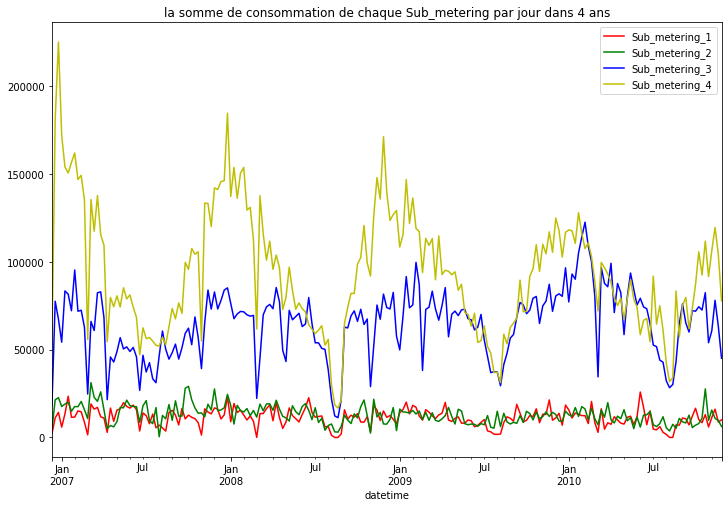

In [91]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = df.Sub_metering_1.resample('W').sum().plot(color='r', legend=True)
ax = df.Sub_metering_2.resample('W').sum().plot(color='g', legend=True)
ax = df.Sub_metering_3.resample('W').sum().plot(color='b', legend=True)
ax = df.Sub_metering_4.resample('W').sum().plot(color='y', legend=True)
ax.title.set_text('la somme de consommation de chaque Sub_metering par jour dans 4 ans')
fig.savefig('../data/output/images/sub_metering_days_all_years.png')

Ici, on voit que les sommes de consommation de `Sub_metering 1 et 2` sont proche et faible. Celles de `Sub_metering 3 et 4` sont fort, et elles ont la saisonnalité. Les clients consomment plus dans l'hiver que l'été.